<H3  ALIGN="CENTER"><B><FONT COLOR="#030856">
Roller Coaster Design
</FONT></B></H3>

<FONT SIZE="-1">(Adapted from 
"<A HREF="https://maa.org/press/periodicals/loci/joma/design-of-a-thrilling-roller-coaster/">
 Design of a Thrilling Roller Coaster</A>,"
    by Patricia W. Hammer, Jessica A. King, and Steve Hammer.)
</FONT>

<P>
<DIV ALIGN="CENTER">
    (<I>Click the launch button below to open an interactive copy of this notebook</I>) 
</DIV>
</P>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Pardhanani/KU_mathmodeling/HEAD?labpath=roller_coaster%2Froller_coaster_modeling.ipynb) 

<P><BR>
<TABLE ALIGN="CENTER" WIDTH="80%" BORDER="0"  CELLSPACING="0"  CELLPADDING="8">
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">
        <IMG SRC="./sc_park.jpg" width="350"></IMG>
    </TD>
    <TD ALIGN="CENTER">
        <IMG SRC="./dream_world.jpg" width="350"></IMG>
    </TD>
    <TD ALIGN="CENTER">
        <IMG SRC="./sc_park_boom.jpg" width="270"></IMG>
    </TD>
  </TR>
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">
      <B>Siam Park City, Bangkok</B>
    </TD>
    <TD ALIGN="CENTER">
      <B>Dream World, Pathum Thani</B>
    </TD>
    <TD ALIGN="CENTER">
      <B>The boomerang, at Siam Park City</B>
    </TD>
  </TR>
</TABLE>

<H4>Introduction</H4>
    The overall objective of this module is to explore math modeling 
    strategies for improving the design of roller coasters.  We will do 
    this using some basic algebra and calculus concepts.    
    Many of the ideas, data, and strategy used in this 
    exploration are from Hammer et al. (<A HREF="https://maa.org/press/periodicals/loci/joma/design-of-a-thrilling-roller-coaster/" TARGET="_blank">
 Design of a Thrilling Roller Coaster</A>).
<P>
    Two of the largest and most popular theme parks in Thailand 
    are <A HREF="https://www.dreamworld.co.th/">Dream World</A> in 
    Pathum Thani, and 
    <A HREF="https://www.siamamazingpark.com/index.php">Siam Park City</A> 
    in Bangkok. According to Google reviews, Dream World 
    ranks higher in popularity than Siam Park City.  
    Why is that the case?  Could it be  
    because Dream World has better roller coasters than Siam Park City?!  
    Is there a way to mathematically determine -- or, even better -- 
    to mathematically design the best roller coasters?  
    In this module we will explore certain aspects of this 
    question.

<H4>
    Model 0: A simple case
</H4>

We will start with the case of a roller coaster with a single drop 
(i.e., a single peak and valley).  <P>

The photo on the left below is of the Colossus 
coaster, which was at Six Flags Mountain in Valencia, California, 
and once had the distinction of being the tallest coaster 
in the world.  (Image from <A HREF="http://www.ultimaterollercoaster.com/">www.ultimaterollercoaster.com</A>.)
We want to model the shape of the track in the form of a 
function $y=f(x)$, with $x$, $y$ denoting the horizontal and 
vertical distance (in feet) from some reference point.  The 
sketch on the right shows an example of coordinate locations 
of the peak and valley of some hypothetical coaster.

<TABLE ALIGN="CENTER" WIDTH="80%" BORDER="0"  CELLSPACING="0"  CELLPADDING="8">
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">
      <IMG SRC="./colossus.jpg" width="350">
    </TD>
    <TD ALIGN="CENTER">
      <IMG SRC="./pv_sketch.png" width="350">
    </TD>
  </TR>
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">
      Colossus, Valencia, California.
        <BR> Image from <A HREF="http://www.ultimaterollercoaster.com">http://www.ultimaterollercoaster.com</A>
    </TD>
    <TD ALIGN="CENTER">
      <B>Hypothetical peak / valley example</B>
    </TD>
  </TR>
</TABLE>

<B>Modeling strategy</B><P>

Suppose we use a cubic polynomial, say $f(x)$, 
for the shape of the track  <P>
      
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
$f(x)=ax^3 + bx^2 + cx + d$.  <BR><BR>
To determine the four unknown coefficients 
$a$, $b$, $c$, $d$, we will use 4 conditions that we want 
the track to satisfy. For example: <P>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 
$\begin{array}{l} f(5)=50 ~~~~ \mbox{(peak location)} \\ f^\prime(5)=0 ~~~~ \mbox{(0 slope @ peak)} \\ 
f(65)=5 ~~~~ \mbox{(valley location)} \\ f^\prime(65)=0 ~~~~ \mbox{(0 slope @ valley)} \end{array}$
      <P>

Not that these 4 conditions are among the most important aspects
of the model, since they will uniquely determine $f(x)$ and 
the resulting shape of the track.  Plugging in each of 
these conditions yields a system of 4 linear algebraic 
equations containing the unknowns $a$, $b$, $c$, $d$. 
The solution of this system yields the numerical values of 
these coefficients.  We want to setup and solve the equations 
using software, which is done in the cells below.  However, it is a 
useful learning experience to also do some of that work by hand.
<P><B>Exercise</B>: Find the system of 4 linear algebraic 
    equations.  


The coefficients are: a= 1/2400 , b= -7/160 , c= 13/32 , d= 4705/96


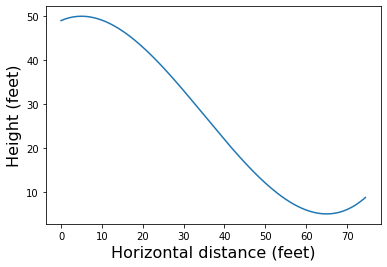

In [63]:
# Python code to find shape of cubic roller coaster track 
# with given peak and valley coordinates.

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

a, b, c, d, x = sp.symbols('a, b, c, d, x') # Declare the sympy variables.
f = a*x**3 + b*x**2 + c*x + d   # Define a general cubic polynomial for the track shape.
df = sp.diff(f,x)               # Ask Python to find its 1st derivative.

# In order to evaluate f and df with numerical inputs, we 
# must lambdify them:
f = sp.lambdify(x, f, "numpy")
df = sp.lambdify(x, df, "numpy")

# The next command sets up the 4 equations and asks Sage 
# to solve for a, b, c, d. 
# A dictionary containing the solutions is retuned in results[0]
#
equations = [f(5)-50, df(5), f(65)-5, df(65)]
results = sp.solve(equations, a, b, c, d, dict=True)

print("The coefficients are: a=",results[0][a], ", b=", results[0][b], 
      ", c=", results[0][c], ", d=", results[0][d])

# Next, we plot the solution and see what it looks like
# plot( ((1/2400)*x^3 + (-7/160)*x^2 + (13/32)*x + 4705/96), (x,0,75))
x = np.arange(0, 75, 0.5)
plt.plot( x, ((results[0][a])*x**3 + (results[0][b])*x**2 + (results[0][c])*x + results[0][d]))
plt.xlabel('Horizontal distance (feet)', fontsize=16)
plt.ylabel('Height (feet)', fontsize=16)
plt.show()

<B>But, is this coaster สนุก สุดสุด?!!</B>
<P>
    Hammer et al. define <FONT COLOR="#930856"><U>the thrill</U></FONT> 
of a coaster as follows:
"The thrill of a drop is defined to be the angle of steepest descent 
    in the drop (in radians) multiplied by the total vertical 
    distance in the drop.  The thrill of the coaster is defined as 
    the sum of the thrills of each drop."
    
<P>
    Using this definition, compute the thrill of the drop 
in the above example.  How? <BR>
Step 1: Find the maximum value of $|f^\prime|$ on the interval 
    &nbsp; (this will be the slope of steepest descent)<BR>
    Step 2: Angle of steepest descent = <TT>arctan</TT> (slope of steepest descent) <BR>
    Step 3: Multiply angle by vertical 
    distance between peak and valley
    <P><BR>
Again, we want Python to do most of the work, but we 
must understand what work needs to be done. <BR>
Here's how to do Step 1, from Hammer et al: <P> 
"<FONT COLOR="#030856">How do we maximize $f^\prime$ 
on a closed interval?  We determine critical points of $f^\prime$ and then 
compare function values of $f^\prime$ at critical points and endpoints.  The 
critical points of $f^\prime$ are found by solving $f^{\prime\prime}(x)=0$ on the restricted 
$x$ interval.  Finally we evaluate $f^\prime(x)$ at all critical points 
and endpoints and choose the maximum value.</FONT>"

In [104]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define f(x):
x = sp.symbols('x')
f = (results[0][a])*x**3 + (results[0][b])*x**2 + (results[0][c])*x + results[0][d]
fp = sp.diff(f,x)        # Derivative of f
fpp = sp.diff(fp,x)      # Derivative of f' = 2nd derivative of f

# Find critical points of f'
resultnew = sp.solve(fpp-0, x, solution_dict=True)
# A dictionary containing the solutions is retuned in resultnew[0]

print("Critical point(s) of f' are at: x =", resultnew[0])

 # Compute thrill using its definition
fp = sp.lambdify(x, fp, "numpy")
thrill = np.arctan( float(abs( fp(resultnew[0])))) * (50-5)
                                         # Note that arctan of slope = angle in radians.
print ("'Thrill' of this roller coaster=", thrill)

Critical point(s) of f' are at: x = 35
'Thrill' of this roller coaster= 37.9869293750927


<FONT SIZE="+1"><B>Exercise</B></FONT>

<P><BR>
Shown below are two real-world coasters, together with data on the 
coordinates of peak and valley for a single drop.  Determine 
which drop is more thrilling.
    
<TABLE ALIGN="CENTER" WIDTH="80%" BORDER="0"  CELLSPACING="0"  CELLPADDING="8">
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">
      <IMG SRC="./colossus.jpg" width="350">
    </TD>
    <TD ALIGN="CENTER">
      <IMG SRC="./steel_dragon.jpg" width="350">
    </TD>
  </TR>
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">Colossus, Valencia, California.
        <BR> Image from <A HREF="http://www.ultimaterollercoaster.com">http://www.ultimaterollercoaster.com</A> <BR>
        Peak @ (165 ft, 280 ft); valley @ (372 ft, 88 ft)
    </TD>
    <TD ALIGN="CENTER">Steel Dragon 2000, Nagashima, Japan.
        <BR>Image from <A HREF="http://www.coastergallery.com">http://www.coastergallery.com</A> <BR>
        Peak @ (224 ft, 309 ft); valley @ (469 ft, 79 ft)
    </TD>
  </TR>
</TABLE>

<H5><B><FONT COLOR="#030856">
Some extensions
</FONT></B></H5>

It is fairly straightforward to consider other types of functions, 
instead of cubic polynomials, for modeling the track shape.  
For example, consider the following trigonometric function 
with 4 parameters: $f(x)=a\cos(bx+c)+d$ <BR>
If we know the coordinate locations of the peak and valley, the 
4 parameters can be found using a strategy very similar to 
that of the cubic case.  Try it now for the example with peak 
at (5 ft, 50 ft) and valley at (65 ft, 5 ft). How does the value 
of its thrill compare with that of the cubic case?  <P>

How about if we want to use a 5th order polynomial like: 
$ax^5 + bx^4 + cx^3 + dx^2 + ex +f$?  <BR>
Is it possible?  We have 6 unknown parameters here. How do we find them?  Think 
about it!  <P>

Another direction of extension is to look at roller 
coasters with more than 1 drop.  Recall that the thrill of 
a roller coaster is the sum of the thrills of each drop.  Thus, a coaster with multiple drops may be more thrilling 
than one with only a single drop.  Modeling multiple drops 
is similar -- you just have to find a function for the shape 
of each part of the track separately.